# Milestone Project - SkimLit
This is a project for the SkimLit application, which is designed to help users quickly skim through articles and extract key information. This will make reading medical abstracts easier.

Now, we start by classifying the articles into different categories based on their content. The project uses TensorFlow for building and training the model. 

For example, we're going to classify articles into categories such as "Background", "Methods", "Results", and "Conclusion", etc. The model will be trained on a dataset of articles, and it will learn to predict the category of a new article based on its content.

## Import libraries and modules


In [46]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import os # For checking filenames

## Download dataset and load it into tensors
In this model, we will use PubMed articles dataset, which contains a collection of biomedical literature.
Then we will find the most wrong prediction.

### Input - output:
**Input**: a paragraph relate on a topic or a subtitle that encoded into numerical tensor (tokenization and embedding)

**Output**: predicted output (a tensor of probabilities of predictions) base on our model working. This answer the question: `"What section should these sentences belong to?"`

In [3]:
!cd datasets & git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git 
! ls pubmed-rct

/bin/bash: /home/dikhang_hcmut/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 4.20 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
/bin/bash: /home/dikhang_hcmut/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [5]:
! ls datasets/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/
! ls datasets/pubmed-rct/PubMed_20k_RCT/

/bin/bash: /home/dikhang_hcmut/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
dev.txt  test.txt  train.txt
/bin/bash: /home/dikhang_hcmut/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
dev.txt  test.txt  train.txt


In [9]:
# Using "20k datasets" with numbers replaced by "@" sign
data_dir = "datasets/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['datasets/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'datasets/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'datasets/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

## Preprocessing data
It's time to become one with it.
The best way is visualizating them!

In [10]:
# Function for read all content in lines of a document
def get_lines(filename):
    """
    read filename and returns the lines of text as a list.

    Args:
        filename (str): containing the target filepath
    """
    with open(filename, "r") as f:
        return f.readlines()

In [11]:
# Read in training line
train_lines = get_lines(data_dir + "train.txt")
train_lines

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [12]:
test_lines = get_lines(data_dir + "test.txt")
test_lines[:10]

['###24845963\n',
 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n',
 'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .\n',
 'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .\n',
 'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .\n',
 "RESULTS\tThe percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .\n",
 'RE

The form of data would be presented on is:
> [{
>    
>    'line_number': 0,
>
>    'target': 'BACKGROUND'
>
>   'text' : 'e.g. \n'
>
>    'total_line': 11
>
> }, ...]

In [13]:
# Fucntion turns each of out datasets into above format
def preprocess_text_with_line_numbers(filename):
    input_lines = get_lines(filename) # get all line of filename
    abstract_lines = "" # create an empty abstract
    abstract_samples = [] # create an empty list of abstracts
    
    for line in input_lines:
        if line.startswith("###"): # Check if this is an ID line
            abstract_id = line
            abstract_lines = "" # reset the abstract_lines
        elif line.isspace():
            abstract_lines_split = abstract_lines.splitlines()
    
             # Iterate through each line in a single abstract and count them at the same time
            for abstract_line_number, abstract_line in enumerate(abstract_lines_split):
                line_data = {}
                target_text_split = abstract_line.split("\t")
                if len(target_text_split) < 2:
                    continue
                line_data = {
                    "line_number": abstract_line_number,
                    "target": target_text_split[0],
                    "text": target_text_split[1].lower(),
                    "total_lines": len(abstract_lines_split) - 1
                }

                abstract_samples.append(line_data)
        else: # the line contains a labelled sentence
            abstract_lines += line
    
    return abstract_samples

In [14]:
# Get data from file and preprocess it
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name of validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [15]:
train_samples[:10]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [24]:
len(train_lines)

210040

We need to turn into DataFrame if wanna further visualize them

In [25]:
# Turn into dataframe
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

print(train_df.head(14))
print(train_df.target.value_counts())

    line_number       target  \
0             0    OBJECTIVE   
1             1      METHODS   
2             2      METHODS   
3             3      METHODS   
4             4      METHODS   
5             5      METHODS   
6             6      RESULTS   
7             7      RESULTS   
8             8      RESULTS   
9             9      RESULTS   
10           10      RESULTS   
11           11  CONCLUSIONS   
12            0   BACKGROUND   
13            1   BACKGROUND   

                                                 text  total_lines  
0   to investigate the efficacy of @ weeks of dail...           11  
1   a total of @ patients with primary knee oa wer...           11  
2   outcome measures included pain reduction and i...           11  
3   pain was assessed using the visual analog pain...           11  
4   secondary outcome measures included the wester...           11  
5   serum levels of interleukin @ ( il-@ ) , il-@ ...           11  
6   there was a clinically relevant 

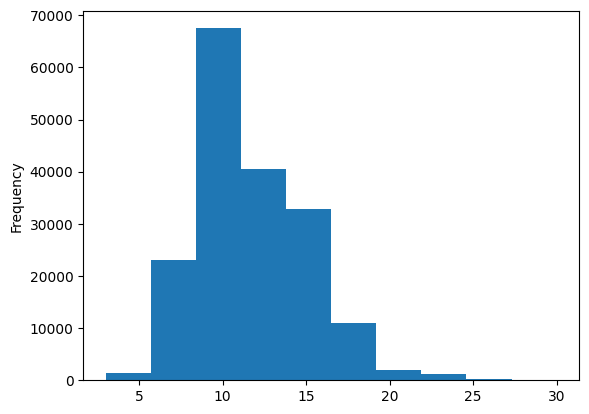

In [26]:
# Check the length of the different lines
train_df.total_lines.plot.hist();

In [27]:
# Get lists of sentences
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

### Turn our labels in to numerical tensor embedded
*Machine Learning requires numerical values as inputs and outputs.*

**One hot encoder**

In [28]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output= False) # we want non_sparse matrix

train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1,1))

In [21]:
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

**Label encode labels**

In [36]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

## Get class names and numer of classes from LabelEncoder instance

In [31]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [32]:
# Download the helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

/bin/bash: /home/dikhang_hcmut/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2025-09-10 08:55:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.004s  

2025-09-10 08:55:03 (2.36 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [33]:
from helper_functions import calculate_results

## Trainning with various types of models

### Model 0: Naive Bayes with TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences, y=train_labels_encoded)

,steps,"[('tf-idf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [41]:
# Evaluate baseline model on validation dataset
model_0.score(X=val_sentences, y=val_labels_encoded)

0.7218323844829869

Nice! Looks like *72.2%* accuracy will be the number to beat with our deeper models.

Now let's make some predictions with our baseline model to further evaluate it.

In [42]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [43]:
baseline_results = calculate_results(y_true=val_labels_encoded, y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

*That is the end of model 0 with Tf Idf, for deeper upgrade, we have to prepare our data further.*

### Preparing data for deep learning model
We can use the `TextVectorization` layer from TensorFlow to turn our text into embedded numerical tensors.

In [45]:
from tf.keras import layers

ModuleNotFoundError: No module named 'tf'